# **Building Neural Networks Using IMDB Dataset**

***The IMDb Movie Reviews dataset is a binary sentiment analysis dataset consisting of 50,000 reviews from the Internet Movie Database (IMDb) labeled as positive or negative. The dataset contains an even number of positive and negative reviews.***

### *Loading all the required packages*

In [ ]:
#Base Packages
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

#Visualization Packages
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#Deep Learning Packages
from tensorflow import keras
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import regularizers
from keras.layers import Dropout
from tensorflow.python import metrics
from tensorflow.keras.utils import plot_model

### *Loading the dataset* *(num_words = 10,000 - only the 10000 most frequently occurring words in the movie reviews will be included in the dataset, while all other words will be discarded.)*

In [ ]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [ ]:
max([max(sequence) for sequence in train_data])

9999

### *Decoding Reviews back to text*

In [ ]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])
decoded_review = " ".join(
    [reverse_word_index.get(i - 3, "?") for i in train_data[0]])

### *Data Preparation*

In [ ]:
#Multi-Hot Encoding

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [ ]:
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

In [ ]:
#Splitting the training and validation data

x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

### *x_train and y_train are the vectors of data which we will be using to build the neural network*

### *Model - 1 imdb_mod - 2 Hidden Layers, 16 Nodes Each, activation - relu, optimizer - rmsprop, loss - binary crossentropy*

In [ ]:
#Building the Network

model = keras.Sequential([
    layers.Dense(16, activation="relu",input_shape=(10000,)),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

#Compiling the Model

model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

In [ ]:
# Summary of the Model

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                160016    
                                                                 
 dense_1 (Dense)             (None, 16)                272       
                                                                 
 dense_2 (Dense)             (None, 1)                 17        
                                                                 
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


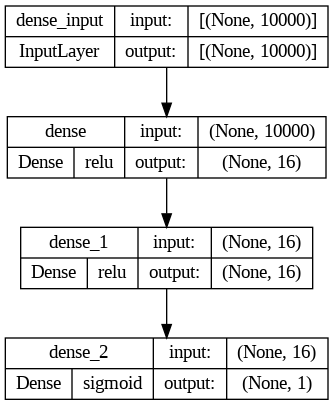

In [ ]:
#Displaying how the model has been executed with 2 hidden layers

plot_model(
model,
to_file="model.png",
show_shapes=True,
show_dtype=False,
show_layer_names=True,
rankdir="TB",
expand_nested=True,
dpi=96,
layer_range=None,
show_layer_activations=True
)

In [ ]:
#Training the model

imdb_mod = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=30,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/30
30/30 [==============================] - 4s 112ms/step - loss: 0.5408 - accuracy: 0.7564 - val_loss: 0.4145 - val_accuracy: 0.8481
Epoch 2/30
30/30 [==============================] - 2s 54ms/step - loss: 0.3257 - accuracy: 0.8876 - val_loss: 0.3156 - val_accuracy: 0.8801
Epoch 3/30
30/30 [==============================] - 1s 43ms/step - loss: 0.2398 - accuracy: 0.9180 - val_loss: 0.2911 - val_accuracy: 0.8850
Epoch 4/30
30/30 [==============================] - 1s 40ms/step - loss: 0.1926 - accuracy: 0.9359 - val_loss: 0.2737 - val_accuracy: 0.8897
Epoch 5/30
30/30 [==============================] - 1s 45ms/step - loss: 0.1621 - accuracy: 0.9465 - val_loss: 0.2858 - val_accuracy: 0.8827
Epoch 6/30
30/30 [==============================] - 1s 40ms/step - loss: 0.1335 - accuracy: 0.9583 - val_loss: 0.2858 - val_accuracy: 0.8844
Epoch 7/30
30/30 [==============================] - 1s 38ms/step - loss: 0.1120 - accuracy: 0.9681 - val_loss: 0.3050 - val_accuracy: 0.8796
Epoch 8/30
3

In [ ]:
#(.history) has a dictionary of values related to the loss and accuracy during the training and validation calling it out specifically to visualize the plots

imdb_dict = imdb_mod.history

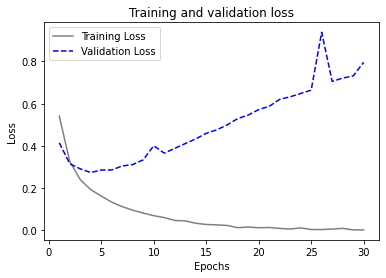

In [ ]:
#Training and Validation Loss

loss_values = imdb_dict["loss"]
val_loss_values = imdb_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "grey", label="Training Loss")
plt.plot(epochs, val_loss_values, color="blue",linestyle="dashed", label="Validation Loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

*From the above loss graph we can select the right number of epochs to be "4" because the validation loss starts to take a spike, after the 4th Epoch.* 


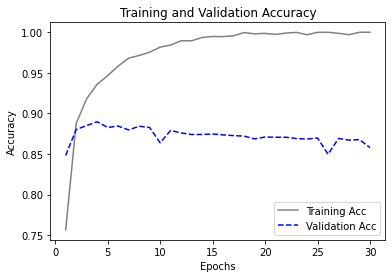

In [ ]:
#Training and Validation Accuracy

acc_values = imdb_dict["accuracy"]
val_accuracy = imdb_dict["val_accuracy"]
epochs = range(1, len(acc_values) + 1)
plt.plot(epochs,acc_values,color='grey',label="Training Acc")
plt.plot(epochs,val_accuracy,color='blue', linestyle='dashed',label="Validation Acc")
plt.title("Training and Validation Accuracy")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

*We can confirm the same thing from the "Accuracy Plot" as well here the accuracy was highest at the 4th Epoch.*

### ***Back Propagation - Retrain the model with 4 epochs***

In [ ]:
model = keras.Sequential([
    layers.Dense(16,activation='relu'),
    layers.Dense(16,activation='relu'),
    layers.Dense(1,activation='sigmoid')
])

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

imdb_mod_1 = model.fit(x_train,
                       y_train,
                       epochs=4,
                       batch_size=512)

Epoch 1/4
49/49 [==============================] - 2s 31ms/step - loss: 0.4723 - accuracy: 0.8032
Epoch 2/4
49/49 [==============================] - 2s 43ms/step - loss: 0.2717 - accuracy: 0.9054
Epoch 3/4
49/49 [==============================] - 2s 37ms/step - loss: 0.2138 - accuracy: 0.9235
Epoch 4/4
49/49 [==============================] - 1s 30ms/step - loss: 0.1775 - accuracy: 0.9365


In [ ]:
results_mod1 = model.evaluate(x_test,y_test)

782/782 [==============================] - 2s 3ms/step - loss: 0.2878 - accuracy: 0.8856


### *The accuracy on the test set for the first model built resulted in 88.56%.*

### *Model - 2 imdb_mod_2 - 1 Hidden Layer, 64 Nodes, activation - tanh, optimizer - rmsprop, loss - mse*

In [ ]:
model = keras.Sequential([
    layers.Dense(64,activation='tanh',input_shape=(10000,)),
    layers.Dense(1,activation='sigmoid')
])

model.compile(optimizer='rmsprop',
              loss='mse',
              metrics=['accuracy'])

imdb_mod_2 = model.fit(partial_x_train,
                       partial_y_train,
                       epochs=50,
                       batch_size=512,
                       validation_data=(x_val,y_val))

Epoch 1/50
30/30 [==============================] - 5s 134ms/step - loss: 0.1726 - accuracy: 0.7683 - val_loss: 0.1222 - val_accuracy: 0.8592
Epoch 2/50
30/30 [==============================] - 2s 74ms/step - loss: 0.1013 - accuracy: 0.8815 - val_loss: 0.1026 - val_accuracy: 0.8696
Epoch 3/50
30/30 [==============================] - 3s 114ms/step - loss: 0.0803 - accuracy: 0.9032 - val_loss: 0.0898 - val_accuracy: 0.8827
Epoch 4/50
30/30 [==============================] - 3s 107ms/step - loss: 0.0683 - accuracy: 0.9176 - val_loss: 0.0899 - val_accuracy: 0.8769
Epoch 5/50
30/30 [==============================] - 5s 161ms/step - loss: 0.0590 - accuracy: 0.9296 - val_loss: 0.0840 - val_accuracy: 0.8873
Epoch 6/50
30/30 [==============================] - 3s 96ms/step - loss: 0.0548 - accuracy: 0.9343 - val_loss: 0.0837 - val_accuracy: 0.8852
Epoch 7/50
30/30 [==============================] - 5s 157ms/step - loss: 0.0497 - accuracy: 0.9417 - val_loss: 0.0849 - val_accuracy: 0.8837
Epoch 8/

In [ ]:
imdb_dict_2 = imdb_mod_2.history

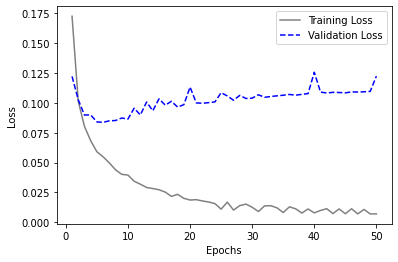

In [ ]:
#Training and Validation Loss

loss = imdb_dict_2['loss']
val_loss = imdb_dict_2['val_loss']
epochs = range(1, len(loss)+1)
plt.plot(epochs, loss, color= "grey", label= "Training Loss")
plt.plot(epochs, val_loss, color= "blue",linestyle= "dashed", label= "Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

*From the above loss graph we can select the right number of epochs to be "3" because the validation loss starts to take a spike, after the 3rd Epoch.* 

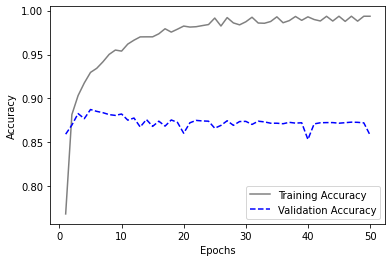

In [ ]:
#Training and Validation Accuracy

accuracy = imdb_dict_2['accuracy']
validation_accuracy = imdb_dict_2['val_accuracy']
epochs = range(1, len(accuracy)+1)
plt.plot(epochs,accuracy,color="grey",label="Training Accuracy")
plt.plot(epochs,validation_accuracy, color= "blue", linestyle="dashed",label="Validation Accuracy")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

*We can confirm the same thing from the "Accuracy Plot" as well here the accuracy was highest at the 3rd Epoch.*

### ***Back Propagation - Retrain the model with 3 epochs***

In [ ]:
model = keras.Sequential([
    layers.Dense(64,activation='tanh',input_shape=(10000,)),
    layers.Dense(1,activation='sigmoid')
])

model.compile(optimizer='rmsprop',
              loss='mse',
              metrics=['accuracy'])

imdb_mod_3 = model.fit(x_train,
                       y_train,
                       epochs=3,
                       batch_size=512)             

Epoch 1/3
49/49 [==============================] - 4s 75ms/step - loss: 0.1482 - accuracy: 0.8057
Epoch 2/3
49/49 [==============================] - 2s 48ms/step - loss: 0.0861 - accuracy: 0.8956
Epoch 3/3
49/49 [==============================] - 2s 50ms/step - loss: 0.0726 - accuracy: 0.9073


In [ ]:
results_mod2 = model.evaluate(x_test,y_test)

782/782 [==============================] - 3s 4ms/step - loss: 0.0864 - accuracy: 0.8837


### *The accuracy on the test set for the second model built resulted in 88.37%.*

### *Model - 3 imdb_mod_4 - 3 Hidden Layers, 64 Nodes Each, activation - relu, optimizer - rmsprop, loss - binary crossentropy, regularisation - l2 (0.001)*

In [ ]:
model = keras.Sequential([
    layers.Dense(64,activation='relu',kernel_regularizer=regularizers.l2(0.001),input_shape=(10000,)),
    layers.Dense(64,activation='relu',kernel_regularizer=regularizers.l2(0.001)),
    layers.Dense(64,activation='relu',kernel_regularizer=regularizers.l2(0.001)),
    layers.Dense(1,activation='sigmoid')
])

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

imdb_mod_4 = model.fit(partial_x_train,
                       partial_y_train,
                       epochs=50,
                       batch_size=512,
                       validation_data = (x_val,y_val))

Epoch 1/50
30/30 [==============================] - 4s 103ms/step - loss: 0.7665 - accuracy: 0.7441 - val_loss: 0.5748 - val_accuracy: 0.8566
Epoch 2/50
30/30 [==============================] - 2s 76ms/step - loss: 0.5005 - accuracy: 0.8833 - val_loss: 0.4673 - val_accuracy: 0.8853
Epoch 3/50
30/30 [==============================] - 2s 73ms/step - loss: 0.4160 - accuracy: 0.9073 - val_loss: 0.4593 - val_accuracy: 0.8798
Epoch 4/50
30/30 [==============================] - 3s 108ms/step - loss: 0.3491 - accuracy: 0.9296 - val_loss: 0.4809 - val_accuracy: 0.8655
Epoch 5/50
30/30 [==============================] - 2s 75ms/step - loss: 0.3199 - accuracy: 0.9345 - val_loss: 0.4228 - val_accuracy: 0.8819
Epoch 6/50
30/30 [==============================] - 2s 68ms/step - loss: 0.2922 - accuracy: 0.9382 - val_loss: 0.5339 - val_accuracy: 0.8434
Epoch 7/50
30/30 [==============================] - 2s 70ms/step - loss: 0.2590 - accuracy: 0.9525 - val_loss: 0.5704 - val_accuracy: 0.8401
Epoch 8/50


In [ ]:
imdb_dict_4 = imdb_mod_4.history

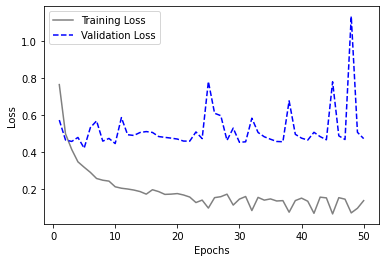

In [ ]:
#Training and Validation Loss

loss = imdb_dict_4['loss']
val_loss = imdb_dict_4['val_loss']
epochs = range(1, len(loss)+1)
plt.plot(epochs,loss,color='grey',label='Training Loss')
plt.plot(epochs,val_loss,color='blue',linestyle='dashed',label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

*From the above loss graph we can select the right number of epochs to be "3" because the validation loss starts to take a spike, after the 3rd Epoch.* 

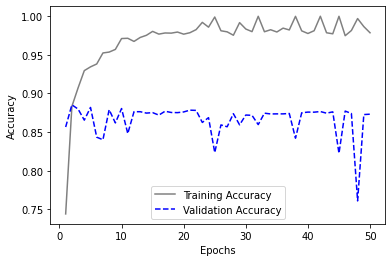

In [ ]:
#Training and Validation Accuracy

accuracy = imdb_dict_4['accuracy']
val_accuracy = imdb_dict_4['val_accuracy']
epochs = range(1, len(accuracy)+1)
plt.plot(epochs,accuracy,color='grey',label='Training Accuracy')
plt.plot(epochs,val_accuracy,color='blue',linestyle='dashed',label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

*We can confirm the same thing from the "Accuracy Plot" as well here the accuracy was highest at the 3rd Epoch.*

### ***Back Propagation - Retrain the model with 3 epochs***

In [ ]:
model = keras.Sequential([
    layers.Dense(64,activation='relu',kernel_regularizer=regularizers.l2(0.001),input_shape=(10000,)),
    layers.Dense(64,activation='relu',kernel_regularizer=regularizers.l2(0.001)),
    layers.Dense(64,activation='relu',kernel_regularizer=regularizers.l2(0.001)),
    layers.Dense(1,activation='sigmoid')
])

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

imdb_mod_5 = model.fit(x_train,
                       y_train,
                       epochs=3,
                       batch_size=512)

Epoch 1/3
49/49 [==============================] - 4s 54ms/step - loss: 0.6796 - accuracy: 0.7851
Epoch 2/3
49/49 [==============================] - 3s 54ms/step - loss: 0.4452 - accuracy: 0.8904
Epoch 3/3
49/49 [==============================] - 3s 52ms/step - loss: 0.3663 - accuracy: 0.9112


In [ ]:
results_mod3 = model.evaluate(x_test,y_test)

782/782 [==============================] - 3s 4ms/step - loss: 0.4228 - accuracy: 0.8808


### *The accuracy on the test set for the third model built resulted in 88.08%.*

### *Model - 4 imdb_mod_6 - 2 Hidden Layers, 64 Nodes Each, activation - relu, optimizer - rmsprop, loss - binary crossentropy, dropout - 0.5.*

In [ ]:
model = keras.Sequential([
    layers.Dense(64,activation='relu',input_shape=(10000,)),
    layers.Dropout(rate=0.5),
    layers.Dense(64,activation='relu'),
    layers.Dropout(rate=0.5),
    layers.Dense(1,activation='sigmoid')
])

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

imdb_mod_6 = model.fit(partial_x_train,
                       partial_y_train,
                       epochs=50,
                       batch_size=256,
                       validation_data=(x_val,y_val))

Epoch 1/50
59/59 [==============================] - 4s 53ms/step - loss: 0.5113 - accuracy: 0.7557 - val_loss: 0.3270 - val_accuracy: 0.8710
Epoch 2/50
59/59 [==============================] - 2s 40ms/step - loss: 0.2980 - accuracy: 0.8853 - val_loss: 0.2829 - val_accuracy: 0.8859
Epoch 3/50
59/59 [==============================] - 3s 53ms/step - loss: 0.2243 - accuracy: 0.9152 - val_loss: 0.2732 - val_accuracy: 0.8903
Epoch 4/50
59/59 [==============================] - 3s 44ms/step - loss: 0.1697 - accuracy: 0.9391 - val_loss: 0.2950 - val_accuracy: 0.8883
Epoch 5/50
59/59 [==============================] - 2s 41ms/step - loss: 0.1347 - accuracy: 0.9513 - val_loss: 0.3231 - val_accuracy: 0.8841
Epoch 6/50
59/59 [==============================] - 3s 56ms/step - loss: 0.1069 - accuracy: 0.9655 - val_loss: 0.3759 - val_accuracy: 0.8821
Epoch 7/50
59/59 [==============================] - 7s 112ms/step - loss: 0.0857 - accuracy: 0.9726 - val_loss: 0.4238 - val_accuracy: 0.8778
Epoch 8/50
5

In [ ]:
imdb_dict_6 = imdb_mod_6.history

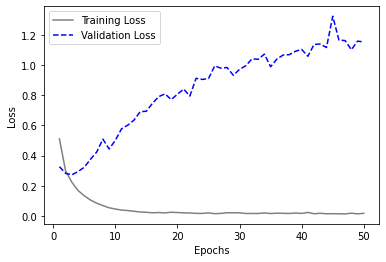

In [ ]:
#Training and Validation Loss

loss = imdb_dict_6['loss']
val_loss = imdb_dict_6['val_loss']
epochs = range(1, len(loss)+1)
plt.plot(epochs,loss,color='grey',label='Training Loss')
plt.plot(epochs,val_loss,color='blue',linestyle='dashed',label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

*From the above loss graph we can select the right number of epochs to be "3" because the validation loss starts to take a spike, after the 3rd Epoch.* 

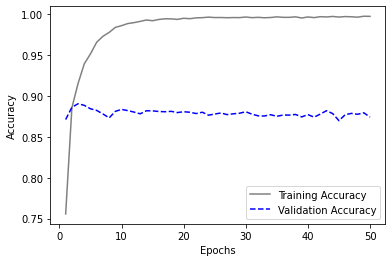

In [ ]:
#Training and Validation Accuracy

accuracy = imdb_dict_6['accuracy']
val_accuracy = imdb_dict_6['val_accuracy']
epochs = range(1, len(accuracy)+1)
plt.plot(epochs,accuracy,color='grey',label='Training Accuracy')
plt.plot(epochs,val_accuracy,color='blue',linestyle='dashed',label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

*We can confirm the same thing from the "Accuracy Plot" as well here the accuracy was highest at the 3rd Epoch.*

### ***Back Propagation - Retrain the model with 3 epochs***

In [ ]:
model = keras.Sequential([
    layers.Dense(64,activation='relu',input_shape=(10000,)),
    layers.Dropout(rate=0.5),
    layers.Dense(64,activation='relu'),
    layers.Dropout(rate=0.5),
    layers.Dense(1,activation='sigmoid')
])

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

imdb_mod_7 = model.fit(x_train,
                       y_train,
                       epochs=3,
                       batch_size=256)

Epoch 1/3
98/98 [==============================] - 4s 36ms/step - loss: 0.4371 - accuracy: 0.8022
Epoch 2/3
98/98 [==============================] - 3s 30ms/step - loss: 0.2614 - accuracy: 0.9015
Epoch 3/3
98/98 [==============================] - 3s 30ms/step - loss: 0.2067 - accuracy: 0.9238


In [ ]:
results_mod4 = model.evaluate(x_test,y_test)

782/782 [==============================] - 3s 4ms/step - loss: 0.3025 - accuracy: 0.8852


### *The accuracy on the test set for the fourth model built resulted in 88.52%.*

### *Model - 5 imdb_mod_8 - 1 Hidden Layer, 32 Nodes, activation - tanh, optimizer - adam, loss - mse, dropout - 0.3.*

In [ ]:
model = keras.Sequential([
    layers.Dense(32,activation='tanh',input_shape=(10000,)),
    layers.Dropout(rate=0.3),
    layers.Dense(1,activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='mse',
              metrics=['accuracy'])

imdb_mod_8 = model.fit(partial_x_train,
                       partial_y_train,
                       epochs=50,
                       batch_size=512,
                       validation_data=(x_val,y_val))

Epoch 1/50
30/30 [==============================] - 3s 71ms/step - loss: 0.1612 - accuracy: 0.7871 - val_loss: 0.1096 - val_accuracy: 0.8676
Epoch 2/50
30/30 [==============================] - 1s 46ms/step - loss: 0.0815 - accuracy: 0.9105 - val_loss: 0.0900 - val_accuracy: 0.8898
Epoch 3/50
30/30 [==============================] - 1s 46ms/step - loss: 0.0601 - accuracy: 0.9400 - val_loss: 0.0850 - val_accuracy: 0.8895
Epoch 4/50
30/30 [==============================] - 2s 62ms/step - loss: 0.0475 - accuracy: 0.9549 - val_loss: 0.0835 - val_accuracy: 0.8887
Epoch 5/50
30/30 [==============================] - 2s 72ms/step - loss: 0.0390 - accuracy: 0.9649 - val_loss: 0.0831 - val_accuracy: 0.8874
Epoch 6/50
30/30 [==============================] - 1s 48ms/step - loss: 0.0322 - accuracy: 0.9741 - val_loss: 0.0839 - val_accuracy: 0.8845
Epoch 7/50
30/30 [==============================] - 1s 48ms/step - loss: 0.0273 - accuracy: 0.9793 - val_loss: 0.0861 - val_accuracy: 0.8812
Epoch 8/50
30

In [ ]:
imdb_dict_8 = imdb_mod_8.history

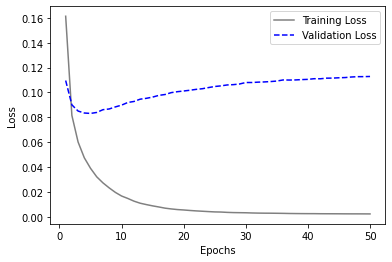

In [ ]:
#Training and Validation Loss

loss = imdb_dict_8['loss']
val_loss = imdb_dict_8['val_loss']
epochs = range(1, len(loss)+1)
plt.plot(epochs,loss,color='grey',label='Training Loss')
plt.plot(epochs,val_loss,color='blue',linestyle='dashed',label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

*From the above loss graph we can select the right number of epochs to be "5" because the validation loss starts to take a spike, after the 5th Epoch.* 

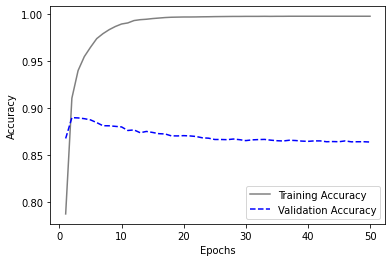

In [ ]:
#Training and Validation Accuracy

accuracy = imdb_dict_8['accuracy']
val_accuracy = imdb_dict_8['val_accuracy']
epochs = range(1, len(accuracy)+1)
plt.plot(epochs,accuracy,color='grey',label='Training Accuracy')
plt.plot(epochs,val_accuracy,color='blue',linestyle='dashed',label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

*We can confirm the same thing from the "Accuracy Plot" as well here the accuracy was highest at the 5th Epoch.*

### ***Back Propagation - Retrain the model with 5 epochs***

In [ ]:
model = keras.Sequential([
    layers.Dense(32,activation='tanh',input_shape=(10000,)),
    layers.Dropout(rate=0.3),
    layers.Dense(1,activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='mse',
              metrics=['accuracy'])

imdb_mod_9 = model.fit(x_train,
                       y_train,
                       epochs=5,
                       batch_size=512)

Epoch 1/5
49/49 [==============================] - 3s 48ms/step - loss: 0.1387 - accuracy: 0.8256
Epoch 2/5
49/49 [==============================] - 2s 51ms/step - loss: 0.0736 - accuracy: 0.9142
Epoch 3/5
49/49 [==============================] - 2s 36ms/step - loss: 0.0572 - accuracy: 0.9359
Epoch 4/5
49/49 [==============================] - 2s 37ms/step - loss: 0.0467 - accuracy: 0.9482
Epoch 5/5
49/49 [==============================] - 2s 35ms/step - loss: 0.0397 - accuracy: 0.9584


In [ ]:
results_mod5 = model.evaluate(x_test,y_test)

782/782 [==============================] - 3s 4ms/step - loss: 0.0885 - accuracy: 0.8787


### *The accuracy on the test set for the fifth model built resulted in 87.87%.*

### *Model - 6 imdb_mod_10 - 2 Hidden Layers, 16 Nodes Each, activation - relu, optimizer - rmsprop, loss - binary crossentropy, dropout - 0.5.*

In [ ]:
model = keras.Sequential([
    layers.Dense(16,activation='relu',input_shape=(10000,)),
    layers.Dropout(rate=0.5),
    layers.Dense(16,activation='relu'),
    layers.Dropout(rate=0.5),
    layers.Dense(1,activation='sigmoid')
])

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

imdb_mod_10 = model.fit(partial_x_train,
                        partial_y_train,
                        epochs=30,
                        batch_size=512,
                        validation_data=(x_val,y_val))

Epoch 1/30
30/30 [==============================] - 5s 132ms/step - loss: 0.6403 - accuracy: 0.6317 - val_loss: 0.5361 - val_accuracy: 0.8253
Epoch 2/30
30/30 [==============================] - 3s 89ms/step - loss: 0.5256 - accuracy: 0.7567 - val_loss: 0.4218 - val_accuracy: 0.8687
Epoch 3/30
30/30 [==============================] - 2s 70ms/step - loss: 0.4401 - accuracy: 0.8181 - val_loss: 0.3653 - val_accuracy: 0.8681
Epoch 4/30
30/30 [==============================] - 1s 38ms/step - loss: 0.3731 - accuracy: 0.8540 - val_loss: 0.3189 - val_accuracy: 0.8862
Epoch 5/30
30/30 [==============================] - 2s 57ms/step - loss: 0.3305 - accuracy: 0.8782 - val_loss: 0.2884 - val_accuracy: 0.8905
Epoch 6/30
30/30 [==============================] - 1s 46ms/step - loss: 0.2905 - accuracy: 0.8957 - val_loss: 0.2845 - val_accuracy: 0.8854
Epoch 7/30
30/30 [==============================] - 1s 37ms/step - loss: 0.2580 - accuracy: 0.9095 - val_loss: 0.2730 - val_accuracy: 0.8877
Epoch 8/30
3

In [ ]:
imdb_dict_10 = imdb_mod_10.history

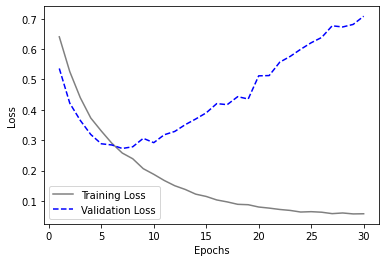

In [ ]:
#Training and Validation Loss

loss=imdb_dict_10['loss']
val_loss=imdb_dict_10['val_loss']
epochs=range(1,len(loss)+1)
plt.plot(epochs,loss,color='grey',label='Training Loss')
plt.plot(epochs,val_loss,color='blue',linestyle='dashed',label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

*From the above loss graph we can select the right number of epochs to be "7" because the validation loss starts to take a spike, after the 7th Epoch.* 

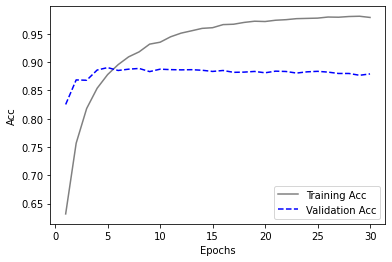

In [ ]:
#Training and Validaiton Accuracy

accuracy=imdb_dict_10['accuracy']
val_accuracy=imdb_dict_10['val_accuracy']
epochs=range(1,len(accuracy)+1)
plt.plot(epochs,accuracy,color='grey',label='Training Acc')
plt.plot(epochs,val_accuracy,color='blue',linestyle='dashed',label='Validation Acc')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend()
plt.show()

*We can confirm the same thing from the "Accuracy Plot" as well here the accuracy was highest at the 7th Epoch.*

### ***Back Propagation - Retrain the model with 7 epochs***

In [ ]:
model = keras.Sequential([
    layers.Dense(16,activation='relu',input_shape=(10000,)),
    layers.Dropout(rate=0.5),
    layers.Dense(16,activation='relu'),
    layers.Dropout(rate=0.5),
    layers.Dense(1,activation='sigmoid')
])

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

imdb_mod_11 = model.fit(x_train,
                        y_train,
                        epochs=7,
                        batch_size=512)

Epoch 1/7
49/49 [==============================] - 2s 32ms/step - loss: 0.6051 - accuracy: 0.6721
Epoch 2/7
49/49 [==============================] - 2s 40ms/step - loss: 0.4556 - accuracy: 0.8067
Epoch 3/7
49/49 [==============================] - 2s 40ms/step - loss: 0.3649 - accuracy: 0.8592
Epoch 4/7
49/49 [==============================] - 1s 30ms/step - loss: 0.3107 - accuracy: 0.8854
Epoch 5/7
49/49 [==============================] - 1s 30ms/step - loss: 0.2701 - accuracy: 0.9060
Epoch 6/7
49/49 [==============================] - 1s 29ms/step - loss: 0.2421 - accuracy: 0.9165
Epoch 7/7
49/49 [==============================] - 1s 28ms/step - loss: 0.2188 - accuracy: 0.9284


In [ ]:
results_mod6 = model.evaluate(x_test,y_test)

782/782 [==============================] - 2s 3ms/step - loss: 0.2930 - accuracy: 0.8871


### *The accuracy on the test set for the sixth model built resulted in 88.71%.*

### *Model - 7 imdb_mod_12 - 2 Hidden Layers, 16 Nodes Each, activation - relu, optimizer - rmsprop, loss - binary crossentropy, dropout - 0.4.*

In [ ]:
model = keras.Sequential([
    layers.Dense(16,activation='relu',input_shape=(10000,)),
    layers.Dropout(rate=0.4),
    layers.Dense(16,activation='relu'),
    layers.Dropout(rate=0.4),
    layers.Dense(1,activation='sigmoid')
])

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

imdb_mod_12 = model.fit(partial_x_train,
                        partial_y_train,
                        epochs=20,
                        batch_size=512,
                        validation_data=(x_val,y_val))

Epoch 1/20
30/30 [==============================] - 6s 123ms/step - loss: 0.6000 - accuracy: 0.6859 - val_loss: 0.4781 - val_accuracy: 0.8522
Epoch 2/20
30/30 [==============================] - 2s 66ms/step - loss: 0.4529 - accuracy: 0.8161 - val_loss: 0.3752 - val_accuracy: 0.8665
Epoch 3/20
30/30 [==============================] - 1s 40ms/step - loss: 0.3641 - accuracy: 0.8659 - val_loss: 0.3106 - val_accuracy: 0.8854
Epoch 4/20
30/30 [==============================] - 1s 41ms/step - loss: 0.3043 - accuracy: 0.8931 - val_loss: 0.2825 - val_accuracy: 0.8898
Epoch 5/20
30/30 [==============================] - 1s 40ms/step - loss: 0.2607 - accuracy: 0.9131 - val_loss: 0.3314 - val_accuracy: 0.8653
Epoch 6/20
30/30 [==============================] - 2s 55ms/step - loss: 0.2242 - accuracy: 0.9273 - val_loss: 0.2775 - val_accuracy: 0.8862
Epoch 7/20
30/30 [==============================] - 2s 65ms/step - loss: 0.1984 - accuracy: 0.9355 - val_loss: 0.3131 - val_accuracy: 0.8765
Epoch 8/20
3

In [ ]:
imdb_dict_12 = imdb_mod_12.history

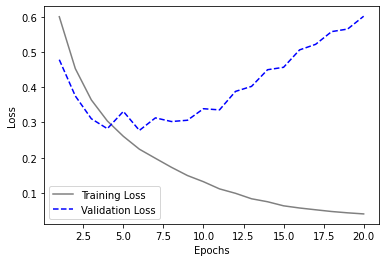

In [ ]:
#Training and Validation Loss

loss=imdb_dict_12['loss']
val_loss=imdb_dict_12['val_loss']
epochs=range(1,len(loss)+1)
plt.plot(epochs,loss,color='grey',label='Training Loss')
plt.plot(epochs,val_loss,color='blue',linestyle='dashed',label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

*From the above loss graph we can select the right number of epochs to be "4" because the validation loss starts to take a spike, after the 4th Epoch.* 

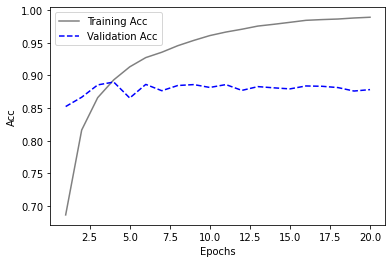

In [ ]:
#Training and Validaiton Accuracy

accuracy=imdb_dict_12['accuracy']
val_accuracy=imdb_dict_12['val_accuracy']
epochs=range(1,len(accuracy)+1)
plt.plot(epochs,accuracy,color='grey',label='Training Acc')
plt.plot(epochs,val_accuracy,color='blue',linestyle='dashed',label='Validation Acc')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend()
plt.show()

*We can confirm the same thing from the "Accuracy Plot" as well here the accuracy was highest at the 4th Epoch.*

### ***Back Propagation - Retrain the model with 4 epochs***

In [ ]:
model = keras.Sequential([
    layers.Dense(16,activation='relu',input_shape=(10000,)),
    layers.Dropout(rate=0.4),
    layers.Dense(16,activation='relu'),
    layers.Dropout(rate=0.4),
    layers.Dense(1,activation='sigmoid')
])

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

imdb_mod_13 = model.fit(x_train,
                        y_train,
                        epochs=4,
                        batch_size=512)

Epoch 1/4
49/49 [==============================] - 2s 30ms/step - loss: 0.5622 - accuracy: 0.7169
Epoch 2/4
49/49 [==============================] - 1s 30ms/step - loss: 0.3932 - accuracy: 0.8449
Epoch 3/4
49/49 [==============================] - 1s 30ms/step - loss: 0.3078 - accuracy: 0.8889
Epoch 4/4
49/49 [==============================] - 1s 30ms/step - loss: 0.2523 - accuracy: 0.9089


In [ ]:
results_mod7 = model.evaluate(x_test,y_test)

782/782 [==============================] - 3s 3ms/step - loss: 0.2729 - accuracy: 0.8885


### *The accuracy on the test set for the seventh model built resulted in 88.85%.*

### *Model - 8 imdb_mod_14 - 2 Hidden Layers, 16 Nodes Each, activation - relu, optimizer - rmsprop, loss - binary crossentropy, regularisation - l2 (0.001).*

In [ ]:
model = keras.Sequential([
    layers.Dense(16,activation='relu',input_shape=(10000,),kernel_regularizer=regularizers.l2(0.001)),
    layers.Dense(16,activation='relu',kernel_regularizer=regularizers.l2(0.001)),
    layers.Dense(1,activation='sigmoid')
])

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

imdb_mod_14 = model.fit(partial_x_train,
                        partial_y_train,
                        epochs=20,
                        batch_size=512,
                        validation_data=(x_val,y_val))

Epoch 1/20
30/30 [==============================] - 3s 71ms/step - loss: 0.5850 - accuracy: 0.7768 - val_loss: 0.4680 - val_accuracy: 0.8538
Epoch 2/20
30/30 [==============================] - 1s 40ms/step - loss: 0.3926 - accuracy: 0.8865 - val_loss: 0.3774 - val_accuracy: 0.8792
Epoch 3/20
30/30 [==============================] - 1s 41ms/step - loss: 0.3173 - accuracy: 0.9105 - val_loss: 0.3444 - val_accuracy: 0.8857
Epoch 4/20
30/30 [==============================] - 1s 41ms/step - loss: 0.2746 - accuracy: 0.9244 - val_loss: 0.3414 - val_accuracy: 0.8841
Epoch 5/20
30/30 [==============================] - 1s 40ms/step - loss: 0.2474 - accuracy: 0.9353 - val_loss: 0.3382 - val_accuracy: 0.8857
Epoch 6/20
30/30 [==============================] - 1s 40ms/step - loss: 0.2286 - accuracy: 0.9429 - val_loss: 0.3342 - val_accuracy: 0.8851
Epoch 7/20
30/30 [==============================] - 2s 62ms/step - loss: 0.2143 - accuracy: 0.9496 - val_loss: 0.3420 - val_accuracy: 0.8836
Epoch 8/20
30

In [ ]:
imdb_dict_14 = imdb_mod_14.history

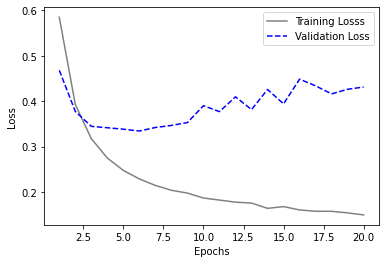

In [ ]:
#Training and Validation Loss

loss=imdb_dict_14['loss']
val_loss=imdb_dict_14['val_loss']
epochs=range(1,len(loss)+1)
plt.plot(epochs,loss,color='grey',label='Training Losss')
plt.plot(epochs,val_loss,color='blue',linestyle='dashed',label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

*From the above loss graph we can select the right number of epochs to be "6" because the validation loss starts to take a spike, after the 6th Epoch.* 

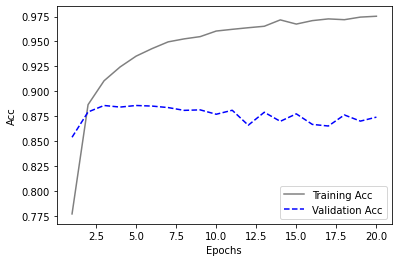

In [ ]:
#Training and Validaiton Accuracy

accuracy=imdb_dict_14['accuracy']
val_accuracy=imdb_dict_14['val_accuracy']
epochs=range(1,len(accuracy)+1)
plt.plot(epochs,accuracy,color='grey',label='Training Acc')
plt.plot(epochs,val_accuracy,color='blue',linestyle='dashed',label='Validation Acc')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend()
plt.show()

*We can confirm the same thing from the "Accuracy Plot" as well here the accuracy was highest at the 6th Epoch.*

### ***Back Propagation - Retrain the model with 6 epochs***

In [ ]:
model = keras.Sequential([
    layers.Dense(16,activation='relu',input_shape=(10000,),kernel_regularizer=regularizers.l2(0.001)),
    layers.Dense(16,activation='relu',kernel_regularizer=regularizers.l2(0.001)),
    layers.Dense(1,activation='sigmoid')
])

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

imdb_mod_15 = model.fit(x_train,
                        y_train,
                        epochs=6,
                        batch_size=512)

Epoch 1/6
49/49 [==============================] - 2s 31ms/step - loss: 0.5346 - accuracy: 0.8167
Epoch 2/6
49/49 [==============================] - 1s 29ms/step - loss: 0.3508 - accuracy: 0.8952
Epoch 3/6
49/49 [==============================] - 1s 29ms/step - loss: 0.2918 - accuracy: 0.9122
Epoch 4/6
49/49 [==============================] - 1s 29ms/step - loss: 0.2637 - accuracy: 0.9240
Epoch 5/6
49/49 [==============================] - 1s 30ms/step - loss: 0.2455 - accuracy: 0.9316
Epoch 6/6
49/49 [==============================] - 2s 34ms/step - loss: 0.2369 - accuracy: 0.9356


In [ ]:
results_mod8 = model.evaluate(x_test,y_test)

782/782 [==============================] - 2s 2ms/step - loss: 0.3388 - accuracy: 0.8860


### *The accuracy on the test set for the eight model built resulted in 88.60%.*

## ***Assessing the best model***

### Loss Evaluation

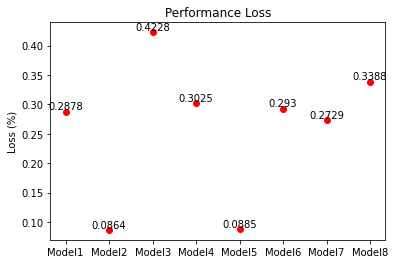

In [ ]:
Models = ('Model1','Model2','Model3','Model4','Model5','Model6','Model7','Model8')
Loss = (0.2878,0.0864,0.4228,0.3025,0.0885,0.2930,0.2729,0.3388)

plt.scatter(Models,Loss,color='red')
plt.title('Performance Loss')
plt.ylabel('Loss (%)')

for (xi, yi) in zip(Models,Loss):
    plt.text(xi, yi, yi, va='bottom', ha='center')


plt.show()

## **Observations:**

1. Model 2 and Model 5 are the only models that were having least loss values during their evaluation on the test set.
2. Model 2 was built using 1 Hidden Layer, 64 Nodes, activation - tanh, optimizer - rmsprop, loss - mse.
3. Model 5 was built using 1 Hidden Layer, 32 Nodes, activation - tanh, optimizer - adam, loss - mse, dropout rate - 0.3.



### Accuracy Evaluation

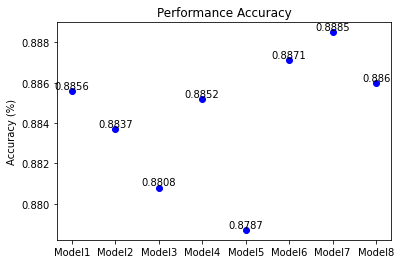

In [ ]:
Models = ('Model1','Model2','Model3','Model4','Model5','Model6','Model7','Model8')
Accuracy = (0.8856,0.8837,0.8808,0.8852,0.8787,0.8871,0.8885,0.8860)

plt.scatter(Models,Accuracy,color='blue')
plt.title('Performance Accuracy')
plt.ylabel('Accuracy (%)')

for (xi, yi) in zip(Models,Accuracy):
    plt.text(xi, yi, yi, va='bottom', ha='center')

plt.show()

## **Observations:**

1. Model 6 and Model 7 are the models with the highest accuracy among all the other models.
2. Model 6 was built 2 Hidden Layers, 16 Nodes Each, activation - relu, optimizer - rmsprop, loss - binary crossentropy, dropout rate - 0.5.
3. Model 7 was built 2 Hidden Layers, 16 Nodes Each, activation - relu, optimizer - rmsprop, loss - binary crossentropy, dropout rate - 0.4.


## **Which is the best model?**

There are two possible ways which I think can be ideal to decide the best model,

1. Model with Highest Accuracy on the Test Set.

2. Model with Least Loss on the Test Set with Moderate Accuracy.

To answer the second point we can look at the following chunk of text to get an understanding of why we aren't considering the model with least loss as a best model.

### Models 2 and 5 have resulted in least loss values for the loss run over the test set but these models have 'mse' as a loss function. These models were just built just to assess the models performance with mse being the loss function. But in reality mse isn't a good loss function to be used for binary/multi-class classification, mse is a good loss function for regression based problems.

### **So the best model is going to be the one with the highest accuracy**

### ***Highest Accuracy***

Model 7 i.e. the model with 2 hidden layers, 16 nodes per layer, dropout rate of 0.4 per layer, optimizer being rmsprop and loss function being binary crossentropy resulted in the highest accuracy among all the other models i.e. 88.85%.